<h1 style='color: blue; font-size: 36px; font-weight: bold;'>EDA e Modelo de Previsão do MVP da NBA</h1>

# Objetivo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Analisar as estatísticas obtidas dentro do período de 1991 até 2021, sobre os jogadores da NBA e criar um modelo de previsão do jogador que será eleito o MVP da temporada regular.

# Obtenção dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Os dados foram retirados do Kaggle do VIVO VINCO, e podem ser acessados por meio do link:
    
https://www.kaggle.com/datasets/vivovinco/19912021-nba-stats
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Os arquivos com que iremos trabalhar possuem estatísticas de jogadores, equipes e MVPs da NBA, de 1991-2021. Os dados foram coletados pelo autor VIVO VINCO por meio de web scraping adaptado do canal Dataquest do Youtube. O canal Dataquest e a fonte dos dados podem ser acessados nos links:
    
https://www.youtube.com/watch?v=JGQGd-oa0l4    

https://www.basketball-reference.com/
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como iremos trabalhar com os dados previamente coletados, nosso projeto parte do ponto após a coleta.

# Apresentação dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Os dados estão distribuídos em 4 arquivos, dentre eles:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>mvps.csv</b>: Contém as estatísticas apenas dos jogadores da NBA que receberam votos para MVP nos anos de 1991 até 2021</li>
<li><b>nicknames.csv</b>: Contém os nomes dos times e suas respectivas abreviações</li>
<li><b>players.csv</b>: Contém as estatísticas dos jogadores da NBA nos anos de 1991 até 2021</li>
<li><b>teams.csv</b>: Contém as estatísticas dos times da NBA nos anos de 1991 até 2021</li>

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("darkgrid")
%matplotlib inline

In [2]:
# arquivo mvps.csv

mvps = pd.read_csv('./mvps.csv', encoding='latin-1', sep=';')
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Colunas do arquivo mvps.csv:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>Rank</b>: Rank do MVP
<li><b>Player</b>: Nome do jogador
<li><b>Age</b>: Idade do jogador
<li><b>Tm</b>: Equipe
<li><b>First</b>: Votos para primeiro lugar
<li><b>Pts Won</b>: Pontos ganhos
<li><b>Pts Max</b>: Máximo de pontos
<li><b>Share</b>: Pontos compartilhados
<li><b>G</b>: Partidas disputadas
<li><b>MP</b>: Minutos jogados por partida
<li><b>PTS</b>: Pontos por jogo
<li><b>TRB</b>: Total de rebotes por jogo
<li><b>AST</b>: Assistências por jogo
<li><b>STL</b>: Roubos por jogo
<li><b>BLK</b>: Bloqueios por jogo
<li><b>FG%</b>: Taxa percentual de acerto de cestas de quadra
<li><b>3P%</b>: Taxa percentual de acerto das bolas de 3 pontos
<li><b>FT%</b>: Taxa percentual de acerto de lances livres
<li><b>WS</b>: Win Share
<li><b>WS/48</b>: Win Share por 48 minutos
<li><b>Year</b>: Ano

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Win Share é uma medida atribuída aos jogadores com base em seu ataque, defesa e tempo de jogo. WS/48 é a win share por 48 minutos inventado por Justin Kubatko. Segundo Kubatko: "Uma win share equivale a um terço de uma vitória de equipe. Se um time vence 60 jogos, há 180 Win Shares para distribuir entre os jogadores". Ou seja, é uma estatística do jogador que tenta dividir o crédito pelo sucesso da equipe para os indivíduos da equipe.

In [3]:
# arquivo nicknames.csv

nick = pd.read_csv('./nicknames.csv', sep=';')
nick.head()

,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Colunas do arquivo nicknames.csv:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>Abbreviation</b>: Abreviação do nome do time
<li><b>Name</b>: Nome do time

In [4]:
# arquivo players.csv

play = pd.read_csv('./players.csv', encoding='latin-1', sep=';')
play.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Colunas do arquivo players.csv:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>Rk</b>: Rank do jogador
<li><b>Player</b>: Nome do jogador
<li><b>Pos</b>: Posição que o jogador atua    
<li><b>Age</b>: Idade do jogador
<li><b>Tm</b>: Equipe - Abreviação
<li><b>G</b>: Partidas disputadas
<li><b>GS</b>: Partidas iniciadas (Titular)
<li><b>MP</b>: Minutos jogados por partida
<li><b>FG</b>: Cestas de quadra por jogo
<li><b>FGA</b>: Tentativas de cestas de quadra por jogo
<li><b>FG%</b>: Taxa percentual de acerto de cestas de quadra
<li><b>3P</b>: Bolas de 3 pontos por jogo   
<li><b>3PA</b>: Tentativas das bolas de 3 pontos por jogo
<li><b>3P%</b>: Taxa percentual de acerto das bolas de 3 pontos
<li><b>2P</b>: Bolas de 2 pontos por jogo   
<li><b>2PA</b>: Tentativas das bolas de 2 pontos por jogo
<li><b>2P%</b>: Taxa percentual de acerto das bolas de 2 pontos    
<li><b>eFG%</b>: Taxa percentual efetiva de acerto de cestas de quadra    
<li><b>FT</b>: Lances livres por jogo   
<li><b>FTA</b>: Tentativas de lances livres por jogo 
<li><b>FT%</b>: Taxa percentual de acerto de lances livres    
<li><b>ORB</b>: Rebotes ofensivos por jogo    
<li><b>DRB</b>: Rebotes defensivos por jogo     
<li><b>TRB</b>: Total de rebotes por jogo
<li><b>AST</b>: Assistências por jogo
<li><b>STL</b>: Roubos por jogo
<li><b>BLK</b>: Bloqueios por jogo    
<li><b>TOV</b>: Total de turnover por jogo     
<li><b>PF</b>: Faltas pessoais por jogo    
<li><b>PTS</b>: Pontos por jogo    
<li><b>Year</b>: Ano

In [5]:
# arquivo teams.csv

team = pd.read_csv('./teams.csv', encoding='latin-1', sep=';')
team.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Colunas do arquivo teams.csv:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li><b>W</b>: Vitórias
<li><b>L</b>: Derrotas
<li><b>W/L%</b>: Percentual de vitórias por derrotas
<li><b>GB</b>: Jogos atrás
<li><b>PTS/G</b>: Pontos realizados por jogo
<li><b>PA/G</b>: Pontos sofridos por jogo    
<li><b>SRS</b>: Simple Rating System - Classificação que leva em conta o diferencial médio de pontos e a força do cronograma
<li><b>Year</b>: Ano    
<li><b>Team</b>: Equipe - Nome

# Limpando os dados

## Verificação do DataFrame mvps

In [6]:
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [7]:
mvps.shape

(474, 21)

In [8]:
mvps.dtypes

Rank        object
Player      object
Age          int64
Tm          object
First        int64
Pts Won      int64
Pts Max      int64
Share      float64
G            int64
MP         float64
PTS        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
FG%        float64
3P%        float64
FT%        float64
WS         float64
WS/48      float64
Year         int64
dtype: object

In [9]:
mvps.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'Year'],
      dtype='object')

In [10]:
mvps.isna().sum()

Rank       0
Player     0
Age        0
Tm         0
First      0
Pts Won    0
Pts Max    0
Share      0
G          0
MP         0
PTS        0
TRB        0
AST        0
STL        0
BLK        0
FG%        0
3P%        0
FT%        0
WS         0
WS/48      0
Year       0
dtype: int64

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Observando os dados do DataFrame <b>mvps</b>, percebemos que não existem dados missing e os tipos de dados de cada coluna estão de acordo com o dado apresentado.

In [11]:
mvps['Player'].unique()

array(['Michael Jordan', 'Magic Johnson', 'David Robinson',
       'Charles Barkley', 'Karl Malone', 'Clyde Drexler', 'Kevin Johnson',
       'Dominique Wilkins', 'Larry Bird', 'Terry Porter', 'Patrick Ewing',
       'John Stockton', 'Isiah Thomas', 'Robert Parish', 'Joe Dumars',
       'Bernard King', 'Kenny Smith', 'Hakeem Olajuwon', 'Tim Hardaway',
       'Kevin McHale', 'Chris Mullin', 'Mark Price', 'Scottie Pippen',
       'Dennis Rodman', 'Brad Daugherty', 'Danny Manning',
       'Detlef Schrempf', "Shaquille O'Neal", 'Shawn Kemp', 'Gary Payton',
       'Mookie Blaylock', 'Latrell Sprewell', 'Kevin Willis',
       'Anfernee Hardaway', 'Jason Kidd', 'Cedric Ceballos', 'Grant Hill',
       'Alonzo Mourning', 'Terrell Brandon', 'Mitch Richmond',
       'Glen Rice', 'Anthony Mason', 'Dikembe Mutombo', 'Tom Gugliotta',
       'Allen Iverson', 'Steve Smith', 'Tim Duncan', 'Vin Baker',
       'Antoine Walker', 'Reggie Miller', 'Rik Smits', 'Michael Finley',
       'Rod Strickland', 'Chr

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Alguns nomes vieram com erro de caracteres não encontrados, isso acontece porque alguns jogadores possuem nomes de origens polaca, servo-croata e/ou bielorrussa, e ao extrair os dados de sua fonte, os caractéres não interpretados foram substituídos por "?". 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Os nomes dos jogadores aparecem tanto no DataFrame <b>mvps</b> quanto no DataFrame <b>play</b>, porém no primeiro com certeza será menor o número de repetições destes nomes por conter apenas informações de jogadores que receberam votos para MVP. Então vamos analisar mais à frente se vale a pena alterar os nomes dos jogadores.

In [12]:
mvps['Tm'].unique()

array(['CHI', 'LAL', 'SAS', 'PHI', 'UTA', 'POR', 'PHO', 'ATL', 'BOS',
       'NYK', 'DET', 'WSB', 'HOU', 'GSW', 'CLE', 'LAC', 'IND', 'ORL',
       'SEA', 'TOT', 'DAL', 'MIA', 'SAC', 'CHH', 'MIN', 'WAS', 'TOR',
       'MIL', 'NJN', 'NOH', 'DEN', 'OKC', 'MEM', 'CHA', 'NOP'],
      dtype=object)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Existe uma descrição <b>TOT</b> para alguns times, segundo a fonte dos dados, essa descrição é apresentada apenas para jogadores que jogaram por duas ou mais equipes na mesma temporada, e os dados dessa descrição são os totais deste jogador, ou seja, a soma das estatísticas de cada equipe pela qual ele atuou.

In [13]:
mvps[mvps['Tm'] == 'TOT']

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
66,11T,Dominique Wilkins,34,TOT,0,1,1010,0.001,74,35.6,...,6.5,2.3,1.2,0.4,0.440,0.288,0.847,8.4,0.153,1994
81,14,Clyde Drexler,32,TOT,0,3,1050,0.003,76,35.9,...,6.3,4.8,1.8,0.6,0.461,0.360,0.824,11.7,0.206,1995
252,13,Vince Carter,28,TOT,0,3,1270,0.002,77,36.7,...,5.2,4.2,1.4,0.6,0.452,0.406,0.798,9.4,0.159,2005
306,6,Chauncey Billups,32,TOT,0,33,1210,0.027,79,35.3,...,3.0,6.4,1.2,0.2,0.418,0.408,0.913,10.1,0.174,2009
326,12T,Stephen Jackson,31,TOT,0,1,1230,0.001,81,38.6,...,5.0,3.7,1.6,0.5,0.423,0.328,0.779,5.0,0.077,2010
467,9,Derrick Rose,32,TOT,1,10,1010,0.010,50,25.6,...,2.6,4.2,1.0,0.4,0.470,0.388,0.866,3.1,0.118,2021
471,13T,James Harden,31,TOT,0,1,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021


In [14]:
mvps.query('Player == "James Harden" and Year == 2021')

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
471,13T,James Harden,31,TOT,0,1,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Vemos que no caso do jogador James Harden, somente é apresentado a somatória do ano de 2021. Não teremos problemas em excluir esses dados, uma vez que no DataFrame <b>play</b> temos os dados de cada jogador detalhados por equipe.

In [15]:
mvps = mvps[mvps['Tm'] != 'TOT']

## Verificação do DataFrame nick

In [16]:
nick.head()

,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats


In [17]:
nick['Name'].unique()

array(['Atlanta Hawks', 'Brooklyn Nets', 'Boston Celtics',
       'Charlotte Bobcats', 'Charlotte Hornets', 'Chicago Bulls',
       'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets',
       'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
       'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers',
       'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks',
       'Minnesota Timberwolves', 'New Jersey Nets', 'New Orleans Hornets',
       'New Orleans Pelicans', 'New Orleans/Oklahoma City Hornets',
       'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic',
       'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers',
       'Seattle SuperSonics', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Vancouver Grizzlies',
       'Washington Wizards', 'Washington Bullets'], dtype=object)

In [18]:
nick.shape

(40, 2)

In [19]:
nick.isnull().sum()

Abbreviation    0
Name            0
dtype: int64

In [20]:
nick.value_counts()

Abbreviation  Name                             
ATL           Atlanta Hawks                        1
BKN           Brooklyn Nets                        1
NOH           New Orleans Hornets                  1
NOK           New Orleans/Oklahoma City Hornets    1
NOP           New Orleans Pelicans                 1
NYK           New York Knicks                      1
OKC           Oklahoma City Thunder                1
ORL           Orlando Magic                        1
PHI           Philadelphia 76ers                   1
PHO           Phoenix Suns                         1
PHX           Phoenix Suns                         1
POR           Portland Trail Blazers               1
SAC           Sacramento Kings                     1
SAS           San Antonio Spurs                    1
SEA           Seattle SuperSonics                  1
TOR           Toronto Raptors                      1
UTA           Utah Jazz                            1
VAN           Vancouver Grizzlies                  

In [21]:
print(f'Total de times:{nick.value_counts().sum()}' )

Total de times:40


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Hoje, em 2022, na NBA existem 32 equipes. Sabemos que é comum times mudarem de nome e até mesmo de cidade, isso explica o total de equipes ser maior que 32.

## Verificação do DataFrame play

In [22]:
play.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [23]:
play.shape

(18044, 31)

In [24]:
play.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Year       int64
dtype: object

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Os tipos das variáveis não estão coerentes com seus dados, vamos ter que corrigir isso mais à frente, primeiro vamos verificar os dados que poderão ser excluídos.

In [25]:
play.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [26]:
play.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Year      0
dtype: int64

In [27]:
play.value_counts().head()

Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P  2PA  2P%  eFG%  FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  Year
Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P  2PA  2P%  eFG%  FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  2021    25
                                                                                                                                               2020    25
                                                                                                                                               2019    25
                                                                                                                                               2018    25
                                                                                                                                               2017    23
dtype: int64

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Apesar de não apresentar nenhum valor nulo, por meio da contagem dos dados podemos observar que possuímos inconsistências em todas as colunas.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Vamos excluir esses dados por meio de uma seleção, onde deixaremos em nosso DataFrame apenas os dados que são diferentes dos títulos das colunas.

In [28]:
df = play[play['Rk'] == 'Rk']
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
47,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
70,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
93,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
118,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
145,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021
17931,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021
17960,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021
17989,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Temos 658 linhas de dados que devem ser excluídos, nosso Dataframe originalmente possui 18044, portanto ao final da exclusão deveremos ter 17386 dados limpos.

In [29]:
play = play[play['Rk'] != 'Rk']
play.shape

(17386, 31)

In [30]:
play = play.apply(pd.to_numeric, errors='ignore')

In [31]:
play.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Year        int64
dtype: object

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Alguns jogadores possuem um <b>*</b> em seu nome, vamos excluir esse caractér dos nomes.

In [32]:
play['Player'] = play['Player'].apply(lambda x: x.replace('*', ''))

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
No DataFrame <b>mvps</b> vimos que existem nomes com "?" no lugar alguma letra. Faremos uma verificação de quantos jogadores possuem nomes nesta situação para avaliar se seria válido alterar os nomes ou não.

In [33]:
set_nomes = {nome for nome in play['Player'] if '?' in nome}
len(set_nomes)

69

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O resultado são 69 nomes que deveriam ser alterados. A princípio podemos pensar em realizar uma simples substituição, mas isso não resolveria todos os casos, portanto teríamos que olhar cada nome em que o caractér "?" aparece e alterarmos. Não parece ser viável no momento, caso isso venha a atrapalhar nossa análise de alguma forma, podemos alterar os nomes.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Aqui também verificaremos a existência da descrição <b>TOT</b> na coluna dos times. Caso exista, iremos excluir esses dados, e manter os dados detalhados por cada equipe que o jogador atuou.

In [34]:
play['Tm'].unique()

array(['POR', 'DEN', 'ORL', 'DET', 'WSB', 'DAL', 'TOT', 'MIL', 'NJN',
       'PHI', 'SAS', 'CHI', 'GSW', 'MIA', 'CLE', 'UTA', 'LAC', 'SEA',
       'ATL', 'PHO', 'BOS', 'CHH', 'SAC', 'MIN', 'LAL', 'HOU', 'NYK',
       'IND', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC',
       'BRK', 'NOP', 'CHO'], dtype=object)

In [35]:
play[play['Tm'] == 'TOT']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
26,24,Kenny Battle,SG,26,TOT,56,8,16.9,2.4,5.0,...,1.5,1.7,3.1,1.1,1.1,0.3,0.9,1.9,6.1,1991
30,26,Benoit Benjamin,C,26,TOT,70,65,31.9,5.5,11.1,...,2.2,8.1,10.3,1.7,0.8,2.1,3.4,2.6,14.0,1991
49,42,Tony Brown,SG-SF,30,TOT,30,0,9.8,1.0,2.7,...,0.8,0.6,1.4,0.5,0.1,0.0,0.5,1.6,2.8,1991
77,67,Lester Conner,PG,31,TOT,74,4,13.6,1.3,2.8,...,0.3,1.2,1.5,2.2,1.1,0.0,0.8,1.0,3.5,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17997,506,Moritz Wagner,C,23,TOT,45,24,16.0,2.3,5.1,...,0.6,2.6,3.2,1.1,0.6,0.4,1.0,2.4,6.9,2021
18004,510,Brad Wanamaker,PG,31,TOT,61,0,17.3,1.9,4.9,...,0.3,1.4,1.7,2.9,0.7,0.2,1.2,1.5,5.5,2021
18022,525,Lou Williams,PG,34,TOT,66,4,21.6,4.0,9.8,...,0.3,1.8,2.1,3.4,0.7,0.1,1.6,0.9,11.3,2021
18028,529,D.J. Wilson,PF,24,TOT,35,1,12.4,1.9,4.8,...,0.6,2.6,3.2,0.7,0.3,0.5,0.6,1.3,5.2,2021


In [36]:
play = play[play['Tm'] != 'TOT']

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Assim garantimos que as estatísticas estão separadas por equipe. A atuação de um jogador pode mudar de acordo com a equipe que ele joga, o calendário de jogos dessa equipe, dentre outros fatores, por isso é importante manter esses dados separados, avaliar apenas o total pode ocultar alguma informação dentro de uma análise.

## Verificação do DataFrame team

In [37]:
team.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets


In [38]:
team.shape

(1033, 9)

In [39]:
team.dtypes

W       object
L       object
W/L%    object
GB      object
PS/G    object
PA/G    object
SRS     object
Year     int64
Team    object
dtype: object

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Aqui também teremos que alterar o tipos das variáveis, e da mesma forma que fizemos anteriormente, só após a exclusão de dados inconsistentes é que alteraremos os tipos.

In [40]:
team.isnull().sum()

W       0
L       0
W/L%    0
GB      0
PS/G    0
PA/G    0
SRS     0
Year    0
Team    0
dtype: int64

In [41]:
team['W'].unique()

array(['56', '44', '39', '30', '26', '24', 'Central Division', '61', '50',
       '48', '43', '41', '33', 'Midwest Division', '55', '54', '52', '31',
       '29', '28', '20', 'Pacific Division', '63', '58', '25', '51', '40',
       '38', '35', '21', '67', '57', '47', '42', '22', '15', '53', '45',
       '60', '36', '49', '19', '11', '62', '34', '32', '13', '27', '59',
       '17', '18', '72', '46', '64', '69', '14', '37', '16', '23', '8',
       '9', 'Southeast Division', 'Northwest Division',
       'Southwest Division', '66', '65', '12', '7', '10', '73'],
      dtype=object)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Neste caso percebe-se algo diferente do DataFrame <b>play</b>, ao invés da repetição dos títulos das colunas, existe uma separação dos times pela divisão a qual eles fazem parte. Esse tipo de descrição atrapalha a análise, portanto devemos excluir esses dados.

In [42]:
team[team['W'].str.contains('Division')]

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
14,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,1991,Midwest Division
22,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,1991,Pacific Division
37,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1992,Central Division
45,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,1992,Midwest Division
...,...,...,...,...,...,...,...,...,...
1003,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,2021,Central Division
1009,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,2021,Southeast Division
1015,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,2021,Northwest Division
1021,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,2021,Pacific Division


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Diferente do que fizemos anteriormente, não podemos simplesmente fazer um filtro em nosso DataFrame e pegar os valores diferentes com apenas uma descrição, pois os dados errados se repetem em todas colunas com o mesmo valor. Então teríamos que repetir o filtro para cada valor encontrado, ou seja, para cada descrição de divisão encontrada acima.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Portanto é mais fácil verificar um padrão de string encontrado, no caso a palavra "Division", e então selecionarmos nosso DataFrame pelas linhas que apresentam valores diferentes das strings que possuem esse padrão.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
São 127 linhas de dados a serem excluídas, o DataFrame <b>team</b> possui 1033 linhas, portanto devem sobrar 906 linhas.

In [43]:
team = team[~team['W'].str.contains('Division')]
team.shape

(906, 9)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Outro detalhe que percebemos neste DataFrame é que na coluna <b>Team</b> alguns nomes dos times possuem um <b>*</b>, segundo a fonte dos dados, são os times que foram aos playoffs naquele ano. Essa informação é interessante, então não podemos simplesmente excluir ou substituir esse caractér.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Verificando a fonte dos dados, para os anos mais recentes os nomes dos jogadores não recebem mais <b>*</b>, além disso, no DataFrame dos MVP's, nenhum jogador tem esse caractér em seu nome, e isso poderá atrapalhar alguma análise feita nesses DataFrames, uma vez que o nome de um jogador pode não ser encontrado por conta desse caractér, por esse motivo o excluímos do nome dos jogadores, mas iremos utilizar no nome dos times.    

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Criaremos uma coluna onde o valor 1 indicará se o time foi aos playoffs naquele ano e 0 caso não tenha ido. Assim garantimos que não perdemos essa informação e após isso retiraremos o caractér <b>*</b> dos nomes.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Também vamos retirar um caractér mal interpretado na coluna <b>GB</b> e substituí-lo por 0, mas escreveremos o 0 como uma string pois não haverá problema, uma vez que alteraremos os tipos das variáveis depois.

In [44]:
team['Playoffs'] = team['Team'].apply(lambda x: 1 if len(x.split('*')) > 1 else 0)
team['Team'] = team['Team'].apply(lambda x: x.replace('*', ''))
team['GB'] = team['GB'].apply(lambda x: x.replace('', '0'))

In [45]:
team = team.apply(pd.to_numeric, errors='ignore')
team.dtypes

W             int64
L             int64
W/L%        float64
GB          float64
PS/G        float64
PA/G        float64
SRS         float64
Year          int64
Team         object
Playoffs      int64
dtype: object

In [46]:
team.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team,Playoffs
0,56,26,0.683,0.0,111.5,105.7,5.22,1991,Boston Celtics,1
1,44,38,0.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers,1
2,39,43,0.476,17.0,103.1,103.3,-0.43,1991,New York Knicks,1
3,30,52,0.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets,0
4,26,56,0.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets,0


## Criando um dataset único com players, nicknames e teams

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Neste ponto, vamos unir as informações que temos em um único dataset. O maior dataset que temos é o do arquivo players.csv, então vamos unir os arquivos nicknames.csv e teams.csv a ele.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Agora iremos transformar o DataFrame <b>nick</b> em um dicionário para facilitar a iteração na hora de buscar o nome do time pela abreviação.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
A ideia aqui é inserir o nome de cada equipe no DataFrame <b>play</b>, assim poderemos unir o DataFrame <b>team</b> com o DataFrame <b>play</b> pela equipe e o ano.

In [47]:
d_nick = dict([(abreviacao, nome) for abreviacao, nome in zip(nick['Abbreviation'], nick['Name'])])

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Criaremos a coluna com o nome por extenso da equipe no DataFrame <b>play</b>.

In [48]:
play['Team'] = play['Tm'].apply(lambda x: d_nick[x])
play.drop(columns='Rk', inplace=True)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Vamos unir os DataFrames e exportar os dados para um arquivo separado.

In [49]:
merg = pd.merge(play, team, how='outer')
merg.to_csv('all_data_players.csv', index=False)

# Análise Exploratória dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nesta seção vamos explorar nossos dados a fim de descobrir curiosidades e gerar insights.

In [50]:
dados = pd.read_csv('./all_data_players.csv', sep=',')
dados.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Year,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,...,1991,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47,1
1,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,0.472,...,1991,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47,1
2,Mark Bryant,PF,25,POR,53,0,14.7,1.9,3.8,0.488,...,1991,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47,1
3,Wayne Cooper,C,34,POR,67,1,11.1,0.9,2.2,0.393,...,1991,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47,1
4,Walter Davis,SG,36,POR,32,1,13.7,2.7,6.1,0.446,...,1991,Portland Trail Blazers,63,19,0.768,0.0,114.7,106.0,8.47,1


## Média de pontos por posição entre 1991 e 2021

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Antes de partir para a análise, vamos entender cada posição do basquete.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Point Guard (Armador) é o jogador que normalmente leva a bola da defesa para o ataque, observa a defesa e escolhe a jogada. Ele sabe como posionar cada jogador no ataque e qual a sua função, é como se ele fosse o "cérebro" do time.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Shooting Guard (Ala Armador) é o braço direito do Point Guard (Armador), caso a defesa adversária tente neutralizar o armador principal, é o ala armador quem assume. Outras responsabilidades do ala armador são as infiltrações e o contra-ataque, pois em geral são jogadores mais rápidos da equipe e tem o papel de arremessar e pontuar mais.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Small Forward (Ala) é normalmente o jogador mais completo do time, jogando pelas laterais da quadra, é o jogador que melhor mescla as funções extremas de armador a pivô. Podem finalizar jogadas de costas para a cesta durante o ataque e, podem ser utilizados para impor sua condição física sobre armadores na defesa.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Power Forward (Líbero) é um jogador que possui um potencial de arremesso e força física, podendo atuar no garrafão como um pivô com maior mobilidade ou fora arremessando. Na defesa o líbero pode bloquear e disputar rebotes.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Center (Pivô) é o jogador que mais atua no garrafão próximo à cesta, tanto na defesa, quanto no ataque. Suas princiais funções incluem, lutar pelos rebotes ofensivos e defensivos, receber passes no ataque e impedir passes na defesa. Na grande maioria das vezes é o atleta mais alto da equipe.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para obter a média de pontos pela posição dos jogadores iremos agrupar nosso DataFrame pelo ano e pelo nome do jogador, com a função agregadora que nos retorna a média dos valores. Após isso precisaremos apenas da coluna com a média de pontos por jogo.

In [51]:
mean_pos = dados.groupby(['Year', 'Pos']).mean()
mean_pos = mean_pos[['PTS']]
mean_pos

PTS
Year Pos           
1991 C     7.100000
     PF    7.830108
     PG    9.288158
     SF   10.681690
     SG   10.026966
...             ...
2021 C     8.399174
     PF    7.613740
     PG    9.816379
     SF    8.027027
     SG    9.610884

[155 rows x 1 columns]

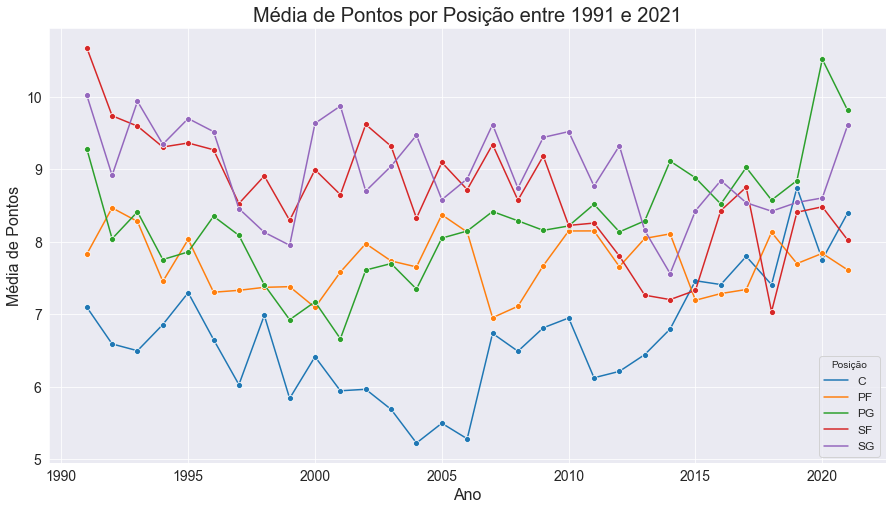

In [52]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=mean_pos, x='Year', y='PTS', hue='Pos', marker='o')
ax.set_title('Média de Pontos por Posição entre 1991 e 2021', fontsize=20)
ax.set_xlabel('Ano', fontsize=16)
ax.set_ylabel('Média de Pontos', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Posição', fontsize='large', loc=4)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por meio do gráfico podemos observar que o Center (Pivô) é a posição que pontua menos. Existem pivôs que são grandes pontuadores como Shaquille O'Neal (MVP em 2000), dentre outros que foram jogadores dominantes na liga, porém a partir da adoção da linha de 3 pontos pela NBA na temporada 79/80 a situação começou a mudar. No começo a linha de 3 pontos não era muito utilizada, mas hoje em dia sabe-se que é um caminho muito útil para a vitória, não existe time que vence nos dias de hoje sem arremessos de 3 pontos, portanto cada vez mais foi sendo exigido dos pivôs que eles arremessassem. O jogo se tornou menos físico e dessa forma os pivôs perderam um pouco sua dominância, porém existem alguns jogadores dessa nova geração como Joel Embiid e Nikola Jokic (MVP em 2021) que continuam impondo seu jogo físico dentro do garrafão tanto no ataque quanto na defesa e que irão jogar atrás da linha de 3 pontos se tiverem espaço, o que dificulta a marcação nesses jogadores.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O Power Forward (Líbero) apresenta uma média de pontos por jogo que apesar de oscilar não possui picos absurdos, se mantendo aproximadamente entre 7 e 8.5 pontos.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O Point Guard (Armador) apesar de ser o capitão do ataque não apresenta a média mais alta de pontuação. Podemos ver no gráfico que suas médias variam bastante, porém a partir de 2005 sua média começou a subir e, a partir de 2013 essa média aumentou ainda mais, chegando a um dos picos mais altos do período em 2020. E uma explicação para isso também envolve a linhas de 3 pontos, jogadores como Steve Nash (MVP em 2005 e em 2006) e Stephen Curry (MVP em 2015 e 2016), por exemplo, além de grandes pontuadores são dominantes na liga. Sendo o último um dos maiores pontuadores da linha de 3 pontos.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O Small Forward (Ala) e o Shooting Guard (Ala Armador) no começo do gráfico são as posições que mostram as maiores médias. O Shooting Guard (Ala Armador) em geral é o jogador que mais pontua pois como auxiliar do Point Guard (Armador) ele tem a função de arremessar e pontuar mais. Vemos que em ambas as posições com o passar dos anos a média de pontos por jogo diminuiu, mas mesmo assim essas ainda são as posições que possuem médias bem altas e jogadores extremamente dominates na liga como, Michael Jordan (MVP em 1988, 1991, 1992, 1996 e 1998), LeBron James (MVP em 2009, 2010, 2012 e 2013) e Kobe Bryant (MVP em  2008).

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
É importante ressaltar que alguns jogadores possuem duas posições, então em determinadas temporadas suas estatísticas contribuíram para pelo menos uma dessas posições. É o caso de James Harden (MVP em 2018) e  Allen Iverson (MVP em 2001), por exemplo, que atuam ou atuaram tanto como Point Guard (Armador) quanto Shooting Guard (Ala Armador).

## Os 10 times com mais aparições em playoffs entre 1991 e 2021

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Anteriormente criamos uma coluna com valores 0 e 1 para indicar se determinado time foi aos playoffs naquele ano. Usaremos essa coluna para criar um DataFrame selecionando apenas as linhas em que nesta coluna o valor é 1. Após a seleção, agruparemos este DetaFrame pelo ano e pelo time buscando a média da coluna de playoffs, e por fim ordenaremos os 10 maiores resultados.

In [53]:
playoffs = dados[dados['Playoffs'] == 1]
playoffs = playoffs.groupby(['Year', 'Team'])[['Playoffs']].mean()
playoffs = playoffs.groupby('Team').sum().sort_values(by='Playoffs', ascending=False)[:10]
playoffs

,Playoffs
Team,
San Antonio Spurs,28.0
Portland Trail Blazers,24.0
Indiana Pacers,24.0
Utah Jazz,23.0
Los Angeles Lakers,23.0
Miami Heat,22.0
Houston Rockets,21.0
Boston Celtics,21.0
Atlanta Hawks,19.0


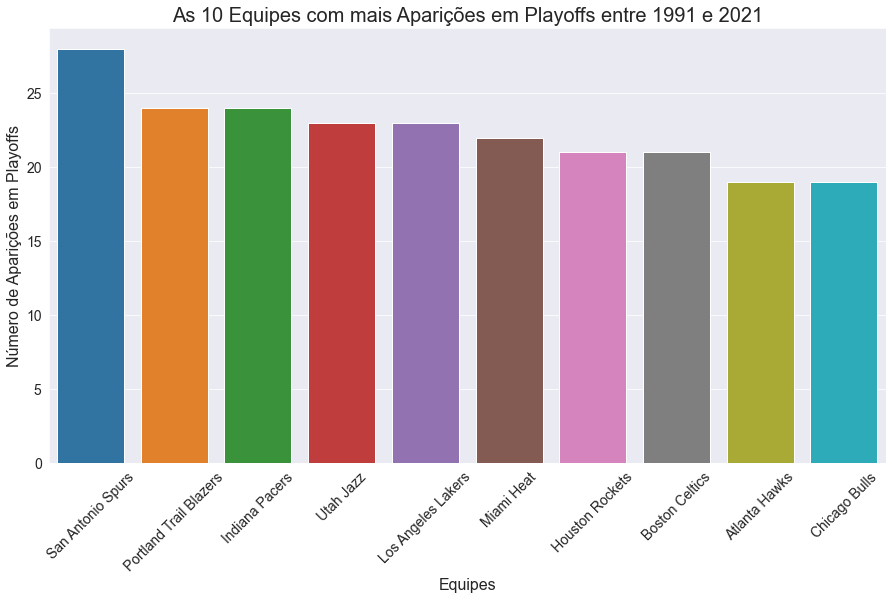

In [54]:
equipes_playoffs = playoffs.index

plt.figure(figsize=(15,8))
ax = sns.barplot(data=playoffs, x=equipes_playoffs, y='Playoffs')
ax.set_title('As 10 Equipes com mais Aparições em Playoffs entre 1991 e 2021', fontsize=20)
ax.set_xlabel('Equipes', fontsize=16)
ax.set_ylabel('Número de Aparições em Playoffs', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nos é apresentado que o time com mais aparições em playoffs entre 1991 e 2021 é o San Antonio Spurs com 28 aparições. Ao todo, desde sua união à NBA o Spurs foi 38 vezes aos playoffs, e hoje detém o recorde da NBA com ida aos playoffs em 22 anos seguidos (1998-2019), além de 5 conquistas de campeonato.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Os grandes campeões, ambos com 17 títulos, e protagonistas da maior rivalidade da liga, o Boston Celtics e o Los Angeles Lakers, ficaram atrás com 23 e 21 aparições em playoffs respectivamente, entre 1991 e 2021.

## Os 10 jogadores com mais lances livres convertidos entre 1991 e 2021

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Criaremos duas colunas no DataFrame <b>dados</b>, uma multiplicando o número de jogos pela média de lances livres por jogo, e outra multiplicando o número de jogos pela média de tentativas de lances livres por jogo. Selecionaremos apenas algumas colunas do DataFrame <b>dados</b> e agruparemos pelo jogador a soma total das colunas criadas.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para criar a coluna com o aproveitamento dos jogadores, dividiremos a coluna de total de lances livres pelo total de tentativas. Ordenaremos e pegaremos apenas os 10 primeiros resultados.

In [55]:
dados['Total FT'] = dados['G'] * dados['FT']
dados['Total FTA'] = dados['G'] * dados['FTA']
rating_ft = dados[['Player', 'Pos', 'G', 'FT', 'FTA', 'FT%', 'Year', 'Team', 'Total FT', 'Total FTA']]
rating_ft = rating_ft.groupby('Player')[['Total FT', 'Total FTA']].sum()
rating_ft['Total FT%'] = round((rating_ft['Total FT'] / rating_ft['Total FTA']) * 100, 2)
rating_ft = rating_ft.sort_values(by='Total FT', ascending=False).reset_index()[:10]
rating_ft

,Player,Total FT,Total FTA,Total FT%
0,Kobe Bryant,8377.2,10011.6,83.67
1,LeBron James,7574.9,10353.5,73.16
2,Karl Malone,7318.1,9624.9,76.03
3,Dirk Nowitzki,7233.6,8248.2,87.70
4,Paul Pierce,6903.2,8576.3,80.49
5,James Harden,6577.9,7675.4,85.70
6,Allen Iverson,6376.1,8181.3,77.94
7,Carmelo Anthony,6195.2,7601.6,81.50
8,Kevin Durant,5946.7,6742.7,88.19
9,Shaquille O'Neal,5923.3,11256.2,52.62


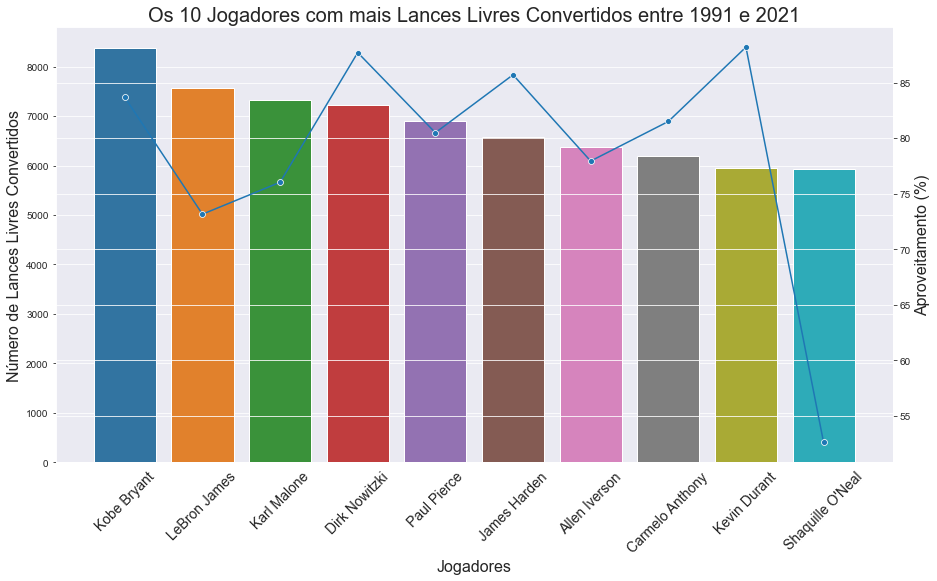

In [56]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1 = sns.barplot(data=rating_ft, x='Player', y='Total FT', ax=ax1)
ax1.figure.set_size_inches(15,8)
ax1.set_title('Os 10 Jogadores com mais Lances Livres Convertidos entre 1991 e 2021', fontsize=20)
ax1.set_xlabel('Jogadores', fontsize=16)
ax1.set_xticklabels(rating_ft['Player'], rotation=45, fontsize=14)
ax1.set_ylabel('Número de Lances Livres Convertidos', fontsize=16)
ax2 = sns.lineplot(data=rating_ft, x='Player', y='Total FT%', marker='o', ax=ax2)
ax2.set_ylabel('Aproveitamento (%)', fontsize=16)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por meio do gráfico, podemos observar que os jogadores possuem bons números de lances livres convertidos além de um ótimo aproveitamento, sendo a maioria acima de 70%.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Shaquille O'Neal, o último no gráfico, possui o pior aproveitamento (52.62%). Como Center (Pivô) Shaquille O'Neal impunha muita força física dentro do garrafão o que o tornava difícil de marcar e um grande alvo de faltas. Fazer faltas em jogadores assim, que são difíceis de marcar e não possuem bons arremessos, acaba compensando em determinados momentos para as defesas adversárias pois diminui a probabilidade de sofrer pontos. O mesmo acontece ultimamente com jogadores como Giannis Antetokounmpo (MVP em 2019 e 2020) por exemplo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Kevin Durant (MVP em 2014) apesar de ser um dos últimos do gráfico, é o jogador que apresenta o maior aproveitamento de lances livres (88.19%). Durant é um dos melhores arremessadores da liga no momento, além do grande aproveitamento em lances livres, também possui um ótimo aproveitamento de cestas de 3 pontos.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Kobe Bryant é mostrado como o melhor jogador em lances livres entre 1991 e 2021 com média de 8377.2 convertidos e um aproveitamento de 83.67%. Kobe atuou como Shooting Guard (Ala Armador) e Small Forward (Ala), posições que auxiliam muito no ataque montando jogadas e levando a bola, além de serem posições que pontuam mais por arremessarem mais e possuírem grande versatilidade tanto atrás da linha de 3 pontos quanto dentro do garrafão.

## Os 10 jogadores com mais cestas de 2 pontos convertidas entre 1991 e 2021

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Usaremos a mesma lógica do item acima porém com as colunas da média de cestas de 2 pontos e da média de tentativas de cestas de 2 pontos.

In [57]:
dados['Total 2P'] = dados['G'] * dados['2P']
dados['Total 2PA'] = dados['G'] * dados['2PA']
rating_2p = dados[['Player', 'Pos', 'G', '2P', '2PA', '2P%', 'Year', 'Team', 'Total 2P', 'Total 2PA']]
rating_2p = rating_2p.groupby('Player')[['Total 2P', 'Total 2PA']].sum()
rating_2p['Total 2P%'] = round((rating_2p['Total 2P'] / rating_2p['Total 2PA']) * 100, 2)
rating_2p = rating_2p.sort_values(by='Total 2P', ascending=False).reset_index()[:10]
rating_2p

,Player,Total 2P,Total 2PA,Total 2P%
0,Shaquille O'Neal,11324.2,19437.5,58.26
1,LeBron James,10928.2,19868.7,55.00
2,Kevin Garnett,10341.1,20509.0,50.42
3,Tim Duncan,10256.1,20169.4,50.85
4,Kobe Bryant,9903.0,20646.9,47.96
5,Karl Malone,9636.7,18686.8,51.57
6,Dirk Nowitzki,9211.2,18533.6,49.70
7,Carmelo Anthony,8221.2,17449.0,47.12
8,Dwyane Wade,7902.6,15736.9,50.22
9,LaMarcus Aldridge,7841.4,15755.3,49.77


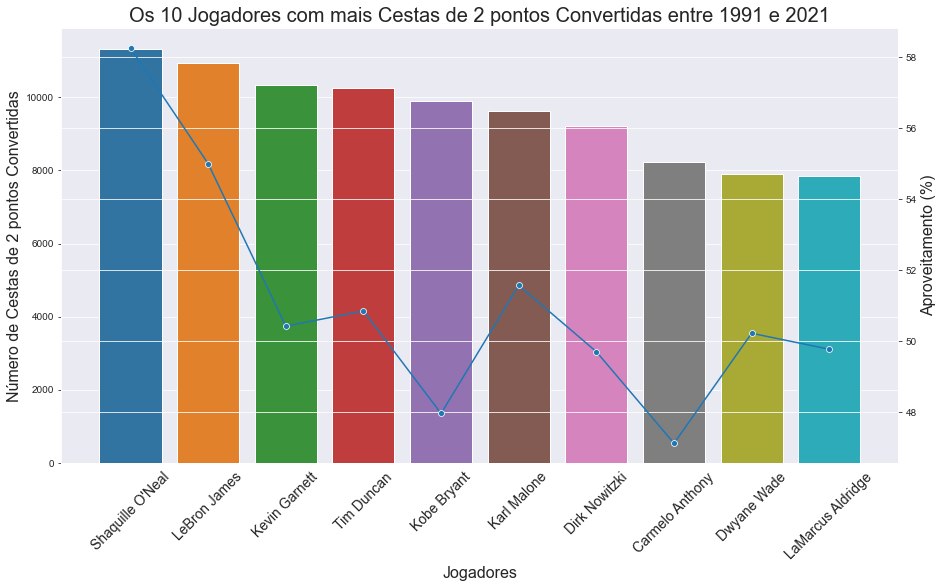

In [58]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1 = sns.barplot(data=rating_2p, x='Player', y='Total 2P', ax=ax1)
ax1.figure.set_size_inches(15,8)
ax1.set_title('Os 10 Jogadores com mais Cestas de 2 pontos Convertidas entre 1991 e 2021', fontsize=20)
ax1.set_xlabel('Jogadores', fontsize=16)
ax1.set_xticklabels(rating_2p['Player'], rotation=45, fontsize=14)
ax1.set_ylabel('Número de Cestas de 2 pontos Convertidas', fontsize=16)
ax2 = sns.lineplot(data=rating_2p, x='Player', y='Total 2P%', marker='o', ax=ax2)
ax2.set_ylabel('Aproveitamento (%)', fontsize=16)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Shaquille O'Neal lidera o gráfico com um total de 11324.2 conversões de cestas de 2 e aproveitamento de 58.26%. Como mencionado anteriormente, o pivô possui um jogo extremamente físico e é extremamente difícil de marcar dentro do garrafão.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
LeBron James fica em segundo com 10928.2 conversões e aproveitamento de 55%. LeBron é outro jogador que atua como Shooting Guard (Ala Armador) e Small Forward (Ala), posições que pontuam bastante e são importantes no ataque. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
No meio do gráfico vemos Kobe Bryant. Kobe apesar de uma boa média de conversões de cestas de 2 pontos (9903.0), apresenta o segundo pior rendimento (47.96%), só ficando à frente de Carmelo Anthony (47.12%). Percebe-se um contraste em relação ao aproveitamento de lances livres de Kobe (83.67%) além de ele ter sido o jogador com mais lances livres convertidos entre 1991 e 2021.

## Os 10 jogadores com mais cestas de 3 pontos convertidas entre 1991 e 2021

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O mesmo raciocínio anterior será utilizado neste item com as colunas da média de cestas de 3 pontos e da média de tentativas de cestas de 3 pontos.

In [59]:
dados['Total 3P'] = dados['G'] * dados['3P']
dados['Total 3PA'] = dados['G'] * dados['3PA']
rating_3p = dados[['Player', 'Pos', 'G', '3P', '3PA', '3P%', 'Year', 'Team', 'Total 3P', 'Total 3PA']]
rating_3p = rating_3p.groupby('Player')[['Total 3P', 'Total 3PA']].sum()
rating_3p['Total 3P%'] = round((rating_3p['Total 3P'] / rating_3p['Total 3PA']) * 100, 2)
rating_3p = rating_3p.sort_values(by='Total 3P', ascending=False).reset_index()[:10]
rating_3p

,Player,Total 3P,Total 3PA,Total 3P%
0,Ray Allen,2969.6,7443.1,39.90
1,Stephen Curry,2827.8,6542.4,43.22
2,Kyle Korver,2450.4,5712.5,42.90
3,James Harden,2441.8,6731.4,36.27
4,Vince Carter,2291.8,6167.4,37.16
5,Jason Terry,2291.3,6007.8,38.14
6,Reggie Miller,2252.6,5702.3,39.50
7,Jamal Crawford,2228.3,6381.7,34.92
8,Paul Pierce,2144.9,5833.3,36.77
9,Damian Lillard,2068.4,5461.3,37.87


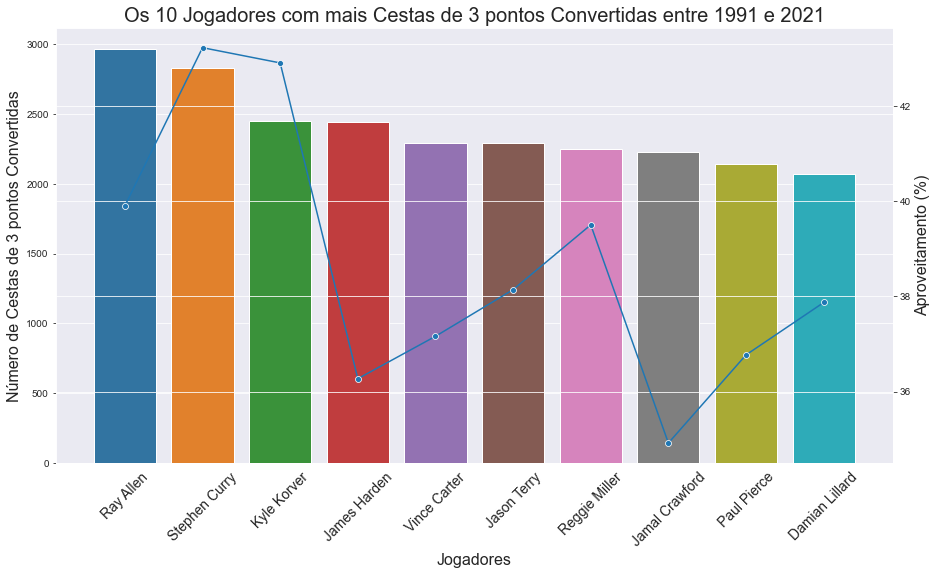

In [60]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1 = sns.barplot(data=rating_3p, x='Player', y='Total 3P', ax=ax1)
ax1.figure.set_size_inches(15,8)
ax1.set_title('Os 10 Jogadores com mais Cestas de 3 pontos Convertidas entre 1991 e 2021', fontsize=20)
ax1.set_xlabel('Jogadores', fontsize=16)
ax1.set_xticklabels(rating_3p['Player'], rotation=45, fontsize=14)
ax1.set_ylabel('Número de Cestas de 3 pontos Convertidas', fontsize=16)
ax2 = sns.lineplot(data=rating_3p, x='Player', y='Total 3P%', marker='o', ax=ax2)
ax2.set_ylabel('Aproveitamento (%)', fontsize=16)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Ray Allen aparece em primeiro como o jogador com mais cestas de convertidas (2969.6) e um aproveitamento também excelente (39.90%). Allen, campeão com o Boston Celtics em 2008, atuava como Shooting Guard (Ala Armador) e era um excelente arremessador da linha de 3 pontos, quebrando recordes que eram anteriormente de Reggie Miller, outro jogador que vemos presente no gráfico acima.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Stephen Curry hoje é a grande estrela da liga em arremessos da linha de 3 pontos, o Point Guard (Armador) possui o maior aproveitamento do gráfico (43.22%). Curry juntamente com o Golden State Warriors trouxeram uma dominância na liga por meio das cestas de 3, vencendo duas vezes o prêmio de MVP e 3 Campeonatos. Como mencionado anteriormente Curry é um dos responsáveis pela média de pontos por partida de sua posição subir consideravelmente nos últimos anos.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
James Harden é outra grande estrela da liga que possui bons números na bola de 3 pontos. Harden apesar de apresentar o segundo pior aproveitamento do gráfico (36.27%), é o segundo jogador que mais tenta a cesta de 3 pontos com uma média de 6731.4 tentativas, ficando atrás somente de Ray Allen.

## Como a cesta de 3 cresceu no jogo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Neste tópico iremos verificar como a cesta de 3 pontos cresceu no jogo. Para isso iremos criar uma coluna com o total de tentativas de arremessos, agruparemos nosso DataFrame pelo ano com a soma total de cada coluna e criaremos uma nova coluna dividindo o total de tentativas de cestas de 3 pontos pelo total de tentativas de arremessos.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dessa forma teremos no final o percentual de tentativas de cestas de 3 pontos por ano de todas as equipes somadas.

In [61]:
dados['Total FGA'] = dados['G'] * dados['FGA']
rating_3pa = dados[['Player', 'Pos', 'G', 'FGA', '3PA', 'Year', 'Team', 'Total FGA', 'Total 3PA']]
rating_3pa = rating_3pa.groupby('Year').sum()
rating_3pa['Total 3PA/FGA'] = round((rating_3pa['Total 3PA'] / rating_3pa['Total FGA']) * 100, 2)
rating_3pa.head()

,G,FGA,3PA,Total FGA,Total 3PA,Total 3PA/FGA
Year,,,,,,
1991,22548,3062.5,251.5,193090.3,15807.3,8.19
1992,22433,3006.4,267.4,193458.9,16874.1,8.72
1993,22511,2964.4,303.9,190314.9,19824.7,10.42
1994,22559,3030.5,344.4,186990.5,21874.6,11.70
1995,22431,2962.7,556.7,180456.8,33876.3,18.77


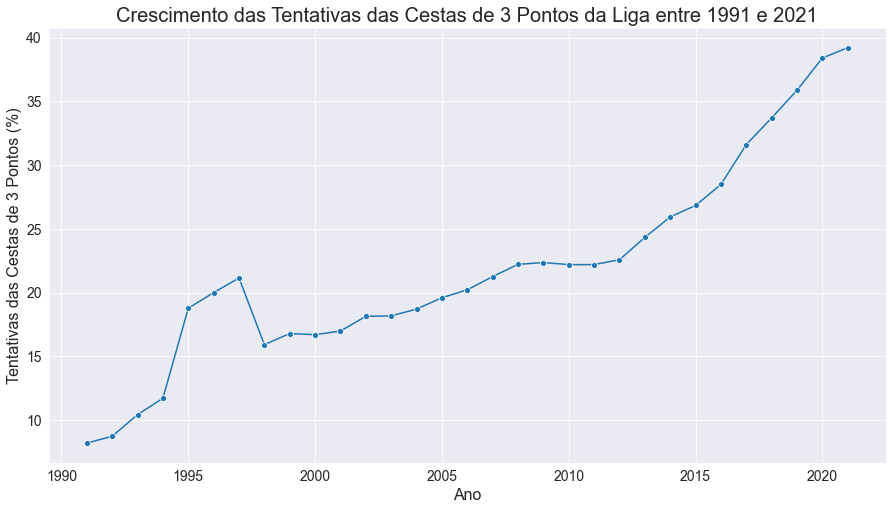

In [62]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=rating_3pa, x='Year', y='Total 3PA/FGA', marker='o')
ax.set_title('Crescimento das Tentativas das Cestas de 3 Pontos da Liga entre 1991 e 2021', fontsize=20)
ax.set_xlabel('Ano', fontsize=16)
ax.set_ylabel('Tentativas das Cestas de 3 Pontos (%)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Podemos observar claramente uma tendência crescente no gráfico, em 1991 houve apenas 8.19% de tentativas de cestas de 3 pontos na liga, enquanto em 2021 temos 39.21%. Ente 1998 e 2012 temos um crescimento não tão elevado, porém a partir de 2012 a curva apresenta um forte inclinação. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Esse tipo de comportamento só reforça a ideia de que os times perceberam que não há vitórias hoje na liga sem a cesta de 3 pontos, posições como o Center (Pivô) que antes não possuíam o costume de arremessar de longa distância hoje precisam arremessar, e o jogo deixou de ser tão físico e passou a ser mais estratégico e voltado para a cesta de 3 pontos com uma maior rotação da bola à procura de um jogador livre para arremessar.

## Tentativas por jogo x Aproveitamento - Cestas de 3 pontos entre 1991 e 2021

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Podemos verificar a relação do aproveitamento e das tentativas da cesta de 3 pontos pela posição do jogador. Faremos isso criando um DataFrame com algumas colunas previamente criadas, e o agruparemos por meio da soma dessas colunas. Criaremos uma coluna com o aproveitamento das cestas de 3 pontos dividindo o total das cestas convertidas pelo total de tentativas, e selecionaremos os 50 primeiros resultados ordenados pelo total de cestas de 3 pontos convertidas.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Utilizaremos um gráfico de dispersão para plotar os 50 jogadores selecionados.

In [63]:
at_pc_3p = dados[['Player', 'Pos', 'G', '3P', '3PA', '3P%', 'Year', 'Team', 'Total 3P', 'Total 3PA']]
at_pc_3p = at_pc_3p.groupby(['Year', 'Player', 'Pos'])[['Total 3P', 'Total 3PA', '3PA']].sum()
at_pc_3p['Total 3P%'] = round((at_pc_3p['Total 3P'] / at_pc_3p['Total 3PA']) * 100, 2)
at_pc_3p = at_pc_3p.sort_values(by='Total 3P', ascending=False).reset_index()[:50]
at_pc_3p.head()

,Year,Player,Pos,Total 3P,Total 3PA,3PA,Total 3P%
0,2016,Stephen Curry,PG,402.9,884.8,11.2,45.54
1,2019,James Harden,PG,374.4,1029.6,13.2,36.36
2,2019,Stephen Curry,PG,351.9,807.3,11.7,43.59
3,2021,Stephen Curry,PG,333.9,800.1,12.7,41.73
4,2017,Stephen Curry,PG,323.9,790.0,10.0,41.00


In [64]:
percentuais = list(at_pc_3p['Total 3P%'])
tentativas = list(at_pc_3p['3PA'])
jogadores = list(at_pc_3p['Player'])

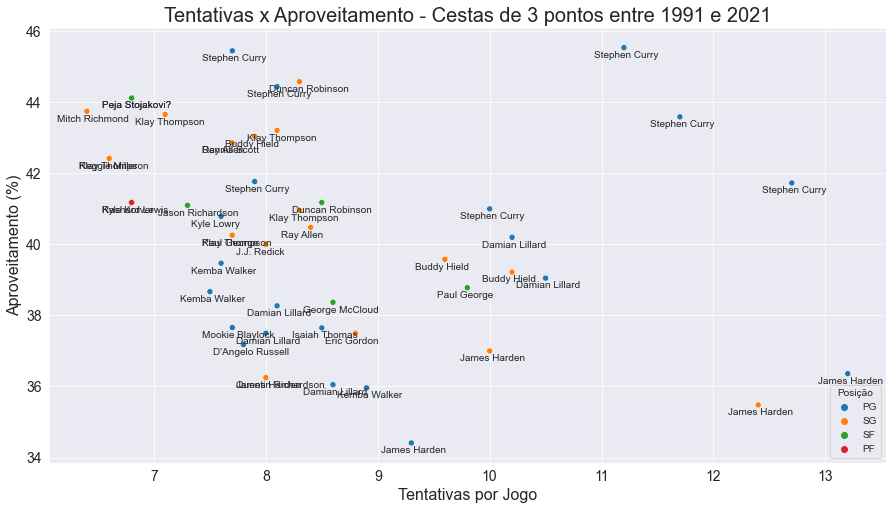

In [65]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=at_pc_3p, x='3PA', y='Total 3P%', hue='Pos')
ax.set_title('Tentativas x Aproveitamento - Cestas de 3 pontos entre 1991 e 2021', fontsize=20)
ax.set_xlabel('Tentativas por Jogo', fontsize=16)
ax.set_ylabel('Aproveitamento (%)', fontsize=16)

for percentual, tentativa, jogador in zip(percentuais, tentativas, jogadores):
    plt.annotate(jogador,
        xy=(tentativa, percentual), 
        xytext=(-30, -10),                  
        textcoords='offset points')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Posição', fontsize = 'medium', loc = 4)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O primeiro ponto que podemos observar no gráfico é a falta do Center (Pivô). Como mencionado antes, essa posição não possui originalmente a característica de arremessador, mesmo que nos últimos anos alguns pivôs passaram a arremessar mais da linha de 3 pontos, isso ainda não torna essa posição dominante nesse quesito.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
No gráfico, existe apenas um ponto com a posição Power Forward (Líbero), seu aproveitamento é bom, porém seu número de tentativas é bem baixo. Essa posição possui um relativo potencial de arremesso, porém sua força física é mais utilizada no ataque dentro do garrafão, isso pode explicar o baixo número de tentativas e o bom aproveitamento.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Existem poucos pontos da posição Small Forward (Ala) e a maioria dele se encontra em um aproveitamento mediano e um número de tentativas também mediano, apenas um ponto possui um aproveitamento acima dos outros.
 
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A maior parte dos pontos é composta pelo Point Guard (Armador) e pelo Shooting Guard (Ala Armador). São as posições controlam e organizam o ataque, possuindo assim um maior potencial de pontuar. Alguns desses pontos são jogadores que possuem um excelente aproveitamento das cestas de 3 e que apareceram como os maiores pontuadores da cesta de 3 como, Stephen Curry (PG), James Harden (PG/SG) e Damian Lillard (PG). Outros pontos pertecem a jogadores que não estão entre os maiores pontuadores, porém possuem um ótimo aproveitamento também, como Klay Thompson (SG).

## Nos últimos anos, os times que foram aos playoffs, arremessaram mais de 3 pontos do que os que não foram?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nos itens anteriores vimos o quão importante a cesta de 3 pontos se tornou e como ela vem crescendo ao longo das temporadas aumentando as chances de vitórias dos times. Com isso, é interessante visualizarmos se os times com maiores tentativas da cesta de 3 pontos aumentam suas chances de irem aos playoffs.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como vimos que a partir de 2013 a curva de crescimento das tentativas da cesta de 3 pontos possui uma inclinação maior, criaremos dois DataFrames a partir do ano de 2013, um com o times que foram aos playoffs e outro com os times que não foram. Agruparemos ambos os DataFrames somando as colunas pelo ano e criaremos uma coluna em cada um com a divisão do total de tentativas da cesta de 3 pontos pelo total de cestas de quadra. É o mesmo raciocínio empregado no item onde foi analisado como a cesta de 3 cresceu no jogo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Assim, ao final teremos a curva de tentativas da cesta de 3 pontos pelo total de cestas para cada ano dos times que foram aos playoffs e dos times que não foram. Uniremos esses DataFrames em um único e plotaremos ambas as curvas.

In [66]:
playoffs_1= dados[(dados['Year'] > 2012) & (dados['Playoffs'] == 1)]
rt_playoffs_1 = playoffs_1[['Player', 'Year', 'Team', 'Total FGA', 'Total 3PA']]
rt_playoffs_1 = rt_playoffs_1.groupby('Year').sum().reset_index()
rt_playoffs_1['Total 3PA/FGA'] = round((rt_playoffs_1['Total 3PA'] / rt_playoffs_1['Total FGA']) * 100, 2)

In [67]:
playoffs_0= dados[(dados['Year'] > 2012) & (dados['Playoffs'] == 0)]
rt_playoffs_0 = playoffs_0[['Player', 'Year', 'Team', 'Total FGA', 'Total 3PA']]
rt_playoffs_0 = rt_playoffs_0.groupby('Year').sum().reset_index()
rt_playoffs_0['Total 3PA/FGA'] = round((rt_playoffs_0['Total 3PA'] / rt_playoffs_0['Total FGA']) * 100, 2)

In [68]:
rt_playoffs_1_0 = pd.merge(rt_playoffs_1, rt_playoffs_0, on=['Year'])
rt_playoffs_1_0

,Year,Total FGA_x,Total 3PA_x,Total 3PA/FGA_x,Total FGA_y,Total 3PA_y,Total 3PA/FGA_y
0,2013,106833.8,27472.3,25.71,94790.5,21566.9,22.75
1,2014,107601.3,28841.5,26.80,96618.5,24110.3,24.95
2,2015,109899.7,30956.2,28.17,95673.0,24199.5,25.29
3,2016,110929.1,33733.9,30.41,97155.3,25518.7,26.27
4,2017,111282.2,36053.6,32.40,98809.7,30351.6,30.72
5,2018,112444.6,38204.1,33.98,99297.4,33162.3,33.40
6,2019,117054.2,43008.2,36.74,102425.8,35720.4,34.87
7,2020,102970.0,40492.6,39.32,85197.9,31768.7,37.29
8,2021,101645.8,40087.9,39.44,89318.4,34789.9,38.95


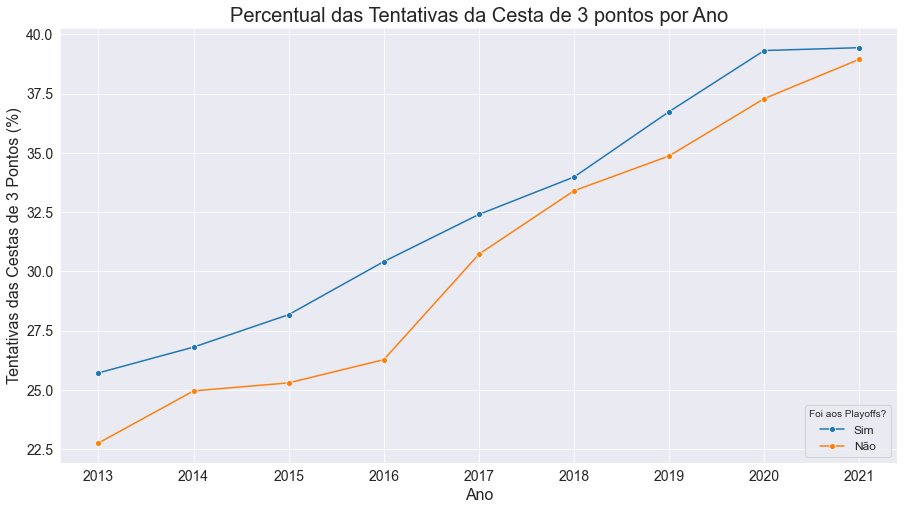

In [69]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=rt_playoffs_1_0, x='Year', y='Total 3PA/FGA_x', marker='o')
ax = sns.lineplot(data=rt_playoffs_1_0, x='Year', y='Total 3PA/FGA_y', marker='o')
ax.set_title('Percentual das Tentativas da Cesta de 3 pontos por Ano', fontsize=20)
ax.set_xlabel('Ano', fontsize=16)
ax.set_ylabel('Tentativas das Cestas de 3 Pontos (%)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Foi aos Playoffs?', labels=['Sim', 'Não'], fontsize = 'large', loc = 4)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O gráfico nos apresenta a tendência onde, times que tentam mais a cesta de 3 pontos tendem a ir aos playoffs mais vezes que os times que não usam tanto deste artifício. Mas devemos ter cuidado, não podemos determinar como uma regra rígida, na grande maioria dos anos a diferença não foi absurda, isso serve apenas como mais um indicativo de como a cesta de 3 pontos vem sendo decisiva para algumas equipes.

# Criação do Modelo de Previsão

## DataFrame do Modelo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O primeiro passo para a criação do nosso modelo é juntar nossos dados em um DataFrame só. Para a análise exploratória usamos o DataFrame <b>dados</b>, agora iremos unir esse DataFrame com o DataFrame <b>mvps</b>, que engloba os dados dos jogadores que possuem estatísticas para MVP.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Criaremos dois DataFrames, um utilizando do DataFrame <b>dados</b> as colunas originais retirando as calculadas nos itens anteriores, e do DataFrame <b>mvps</b> iremos utilizar apenas as colunas com dos dados que interessam para definir um MVP.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Uniremos os dois DataFrames um único que chamaremos de <b>modelo</b>.

In [70]:
dados.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Team',
       'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'Playoffs', 'Total FT',
       'Total FTA', 'Total 2P', 'Total 2PA', 'Total 3P', 'Total 3PA',
       'Total FGA'],
      dtype='object')

In [71]:
df_dados = dados[['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P','3PA', '3P%', 
                   '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB','DRB', 'TRB', 'AST', 'STL', 
                   'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Team','W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 
                   'SRS']]

In [72]:
mvps.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'Year'],
      dtype='object')

In [73]:
df_mvps = mvps[['Player', 'Age', 'Tm', 'Pts Won', 'Pts Max', 'Share', 'Year']]

In [74]:
modelo = pd.merge(df_dados, df_mvps, how='outer')
modelo.fillna(0, inplace=True)
modelo.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W,L,W/L%,GB,PS/G,PA/G,SRS,Pts Won,Pts Max,Share
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,...,63,19,0.768,0.0,114.7,106.0,8.47,0.0,0.0,0.0
1,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,0.472,...,63,19,0.768,0.0,114.7,106.0,8.47,0.0,0.0,0.0
2,Mark Bryant,PF,25,POR,53,0,14.7,1.9,3.8,0.488,...,63,19,0.768,0.0,114.7,106.0,8.47,0.0,0.0,0.0
3,Wayne Cooper,C,34,POR,67,1,11.1,0.9,2.2,0.393,...,63,19,0.768,0.0,114.7,106.0,8.47,0.0,0.0,0.0
4,Walter Davis,SG,36,POR,32,1,13.7,2.7,6.1,0.446,...,63,19,0.768,0.0,114.7,106.0,8.47,0.0,0.0,0.0


## Escolhendo as Features

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Outro ponto importante é por meio de uma matriz de correlação escolhermos quais as features mais significativas para o modelo e evitar features fortemente correlacionadas entre si. Então vamos criar a matriz de correlação e o mapa de calor para avaliar as features.

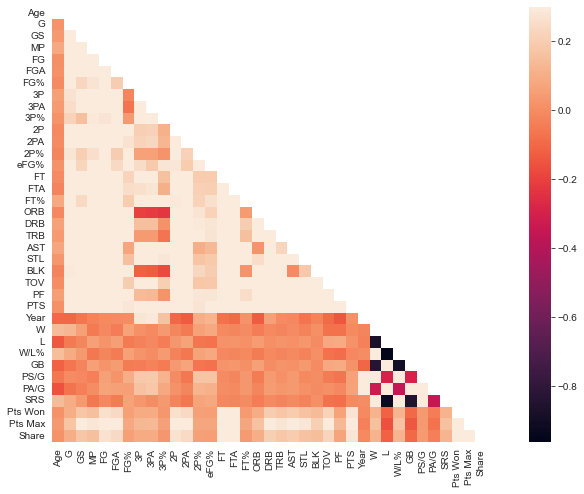

In [76]:
corr = modelo.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Em um set vazio, faremos um loop passando por cada coluna e avaliando suas correlações, as que possuírem correlação maior que 0.85 serão inseridas no set e posteriormente excluídas de nosso modelo. Criamos um set pois uma lista iria conter nomes repetidos das colunas e não precisamos disso.

In [77]:
feat_excl = set()
for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.85:
            coluna = corr.columns[i]
            feat_excl.add(coluna)

feat_excl

{'2P',
 '2P%',
 '2PA',
 '3PA',
 'FG',
 'FGA',
 'FTA',
 'GB',
 'L',
 'PTS',
 'SRS',
 'Share',
 'TRB',
 'W/L%',
 'eFG%'}

## Separação das Variáveis Dependentes e Explicativas

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dentre os dados que definem um MVP precisamos escolher uma variável que será a prevista. E dentre as outras variáveis precisamos escolher quais serão as variáveis explicativas utilizadas para treinar o modelo e prever a variável dependente.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para as variáveis explicativas iremos selecionar todas as variáveis numéricas que sobraram da relação anterior. E para a variável dependente podemos escolher entre <b>Pts Won</b>, <b>Pts Max</b> e <b>Share</b>.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
<b>Pts Won</b> e <b>Pts Max</b> se referem a pontuação recebida pelo jogador e o número máximo de pontos que ele pode receber na eleição para MVP. A divisão entre essas variáveis resulta na variável <b>Share</b>, ou seja, como <b>Share</b> é uma relação das outras duas, escolheremos <b>Share</b> como nossa variável dependente.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dentro das features obtidas anteriormente, aparece nossa variável dependente, portanto não a excluiremos. E além das features selecionadas, iremos excluir algumas que apesar de não estarem na relação, não parecem ser úteis para o modelo.

In [78]:
var_x = ['Age', 'G', 'GS', 'MP', 'FG%', '3P', '3P%', 'eFG%', 'FT', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 
         'TOV', 'PTS', 'Year','W']

var_y = ['Share']

## Separação em Dados de Treino e Dados de Teste

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Estamos trabalhando com uma série temporal, os valores serão previstos para o último ano de dados que possuímos. Dessa forma, não podemos usar uma regressão linear simples, uma vez que as observações são dependentes não podemos treinar nosso modelo de forma dependente, então treinaremos dois modelos diferentes de regularização, sendo eles, Lasso e Ridge.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Como é uma série temporal vamos usar o DataFrame de treino com as informações dos ano anteriores ao último ano de dados que temos. E o DataFrame de teste para testar as previsões para o último ano.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Então queremos prever os resultados de 2021 baseados nos anos anteriores (1991 - 2020).

In [79]:
treino = modelo[modelo['Year'] < 2021]
teste = modelo[modelo['Year'] == 2021]

## Modelo Lasso

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A regularização Lasso tem a vantagem de diminuir a variância do modelo, quando há múltiplas features correlacionadas fortemente esse modelo seleciona apenas uma dessas features e zera os coeficientes das outras para minimizar a penalização.

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(treino[var_x], treino[var_y])
lasso_pred = lasso.predict(teste[var_x])

## Modelo Ridge

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A regularização Ridge faz com que features correlacionadas tenham coeficientes parecidos e a penalização consiste nos quadrados dos coeficientes, ao invés de seus módulos.

In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(treino[var_x], treino[var_y])
ridge_pred = ridge.predict(teste[var_x])

## Comparação Entre os Modelos

In [82]:
lasso_pred = pd.DataFrame(lasso_pred, columns=['Share Lasso'], index=teste.index)
ridge_pred = pd.DataFrame(ridge_pred, columns=['Share Ridge'], index=teste.index)
lasso_ridge = pd.concat([teste[['Player', 'Share']], lasso_pred, ridge_pred], axis=1)
lasso_ridge.sort_values(by='Share', ascending=False).head(10)

,Player,Share,Share Lasso,Share Ridge
15593,Nikola Joki?,0.961,0.015581,0.127370
15760,Joel Embiid,0.580,0.011097,0.155175
15625,Stephen Curry,0.449,0.013660,0.119292
15196,Giannis Antetokounmpo,0.345,0.013233,0.158430
15296,Chris Paul,0.138,0.015154,0.068076
15703,Luka Don?i?,0.042,0.014300,0.125280
15422,Damian Lillard,0.038,0.014514,0.110126
15574,Julius Randle,0.020,0.015368,0.090828
15509,Rudy Gobert,0.008,0.015368,0.073007
15500,Russell Westbrook,0.005,0.014087,0.122361


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para comparar os modelos vamos utilizar um erro métrico conhecido como raiz quadrada do erro-médio (root mean squared error), e escolheremos o modelo que performar o menor erro.

In [83]:
from sklearn.metrics import mean_squared_error

lasso_rmse = mean_squared_error(lasso_ridge['Share'], lasso_ridge['Share Lasso'], squared=False)
ridge_rmse = mean_squared_error(lasso_ridge['Share'], lasso_ridge['Share Ridge'], squared=False)
print(f'root_mean_squared_error Lasso = {lasso_rmse}')
print(f'root_mean_squared_error Ridge = {ridge_rmse}')

root_mean_squared_error Lasso = 0.04983622534356523
root_mean_squared_error Ridge = 0.04836850943918475


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A regularização de Ridge apresentou um termo de erro menor, portanto será o modelo escolhido dentre os dois.

## Testando Outros Anos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para averiguar a eficácia deste modelo iremos testar os outros anos em nosso DataFrame. Começaremos pelo ano de 1992 porque precisamos de pelo menos um ano com dados para treinar e testar o modelo de previsões. Então ao todo usaremos 30 anos.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por meio de um loop, para cada ano em nosso intervalo, criaremos o DataFrames de treino com os dados dos anos anteriores ao ano selecionado, e o de teste com os dados do ano a ser previsto. Iniciaremos o modelo de Ridge e obteremos as previsões do modelo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Com as previsões obtidas, iremos inseri-las em um DataFrame novo onde concatenaremos as colunas com o nome do jogador e com o valor da variável <b>Share</b>, com os valores das previsões. Ordenaremos esse novo DataFrame de forma descrescente por meio das duas variáveis de valores Share.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Em duas listas inicialmente vazias, iremos inserir o nome do jogador que foi efetivamente eleito MVP no ano selecionado e o jogador que foi previsto como MVP. Contabilizaremos os acertos comparando o jogador eleito com o previso e ao final dividiremos o total de acerto pelo total de jogadores. Como estamos trabalhando com 30 anos, ao final teremos 30 jogadores.

In [84]:
anos = [ano for ano in range(1992, 2022)]
acertos = 0
mvps_previstos = []
mvps_eleitos = []
for ano in anos:
    treino = modelo[modelo['Year'] < ano]
    teste = modelo[modelo['Year'] == ano]
    ridge = Ridge(alpha=0.1)
    ridge.fit(treino[var_x], treino[var_y])
    ridge_pred = ridge.predict(teste[var_x])
    mvp = modelo[modelo['Year'] == ano]
    ridge_pred = pd.DataFrame(ridge_pred, columns=['Share Ridge'], index=teste.index)
    mvp = pd.concat([mvp[['Player', 'Share']], ridge_pred], axis=1)
    mvp.sort_values(["Share", 'Share Ridge'], ascending = (False, False))
    mvp_eleito = mvp[mvp['Share'] == mvp['Share'].max()]['Player'].iloc[0]
    mvp_previsto = mvp[mvp['Share Ridge'] == mvp['Share Ridge'].max()]['Player'].iloc[0]
    
    if mvp_eleito == mvp_previsto:
        acertos += 1
        
    mvps_previstos.append(mvp_previsto)
    mvps_eleitos.append(mvp_eleito)

print(f'O modelo atual de Rigde consegue prever com exatidão: {acertos / len(mvps_eleitos) * 100}% dos MVP')    

O modelo atual de Rigde consegue prever com exatidão: 40.0% dos MVP


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O modelo atual conseguiu prever com êxito 12 jogadores dos 30 eleitos, um total de 40%. Não é ainda um resultado satisfatório porém é um bom indicativo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
É possível que os jogadores que não foram previstos corretamente possuam valores da variável <b>Share</b> próximos dos valores do jogador previsto. Então a estimativa dos jogadores que estão na concorrência pelo prêmio de MVP está coerente e indicando uma tendência interessante.

# Próximos Passos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como o modelo não apresentou um resultado satisfatório, para os próximos passos podemos citar:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>Adicionar dados de outros períodos para alimentar e melhorar o modelo</li>
<li>Desenvolver e testar novos modelos</li>
<li>Comparar os novos modelos com o atual e escolher aquele que possuir a melhor taxa de acerto e menor erro</li>
<li>Buscar testar novas features e melhorar a escolha das features mais significantes para o modelo</li>    

# Conclusão

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dentro deste projeto pudemos entender melhor como o Basquete está evoluindo, como as mudanças no jogo estão impactando as estratégias das equipes e o estilo de jogo de algumas posições. Observamos como a bola de 3 pontos se tornou a "queridinha" dos jogadores, e com isso podemos entender o motivo de algumas equipes "morrerem" ou "viverem" pela bola de 3. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Vimos também algumas estatísticas interessantes e comparações entre os jogadores, avaliando os resultados com suas posições e atuações em quadra.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por fim, ao criarmos um modelo de previsões para eleger o MVP da temporada regular, observamos como algumas features impactam os resultados das previsões, e o quão é importante sempre treinar o modelo com mais dados, desenvolver novas métricas de avaliação dos resultados do modelo e sempre procurar um modelo que apresente um bom rendimento e um erro cada vez menor.

# Referências

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
VIVO VINCO. 1991-2021 NBA Stats. Kaggle. Disponível em: https://www.kaggle.com/datasets/vivovinco/19912021-nba-stats. Acesso em 7 mai. 2022.  

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
BASKETBAAL REFERENCE. Basketball-Reference.com. Disponível em: https://www.basketball-reference.com/. Acesso em: 7 mai. 2022.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
WIN SHARE (WS/48). NbaStuffer.com. Disponível em: https://www.nbastuffer.com/analytics101/win-share/#:~:text=Win%20Share%20is%20a%20measure,to%20distribute%20among%20the%20players.%E2%80%9D. Acesso em: 8 mai. 2022.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
BASKETBAAL REFERENCE GLOSSARY. Basketball-Reference.com. Disponível em: https://www.basketball-reference.com/about/glossary.html#:~:text=SRS%20%2D%20Simple%20Rating%20System%3B%20a,thorough%20explanation%20of%20this%20method. Acesso em: 8 mai. 2022.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
ANDRADE, Gustavo. Posições de basquete: quais são e as funções dos jogadores. EsporteLândia, 2019. Disponível em: https://www.esportelandia.com.br/basquete/posicoes-basquete/. Acesso em 8 mai. 2022.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
DATAQUEST. Web Scraping NBA Stats With Python: Data Project [Part 1 of 3]. Youtube jan. 2022. Disponível em: https://www.youtube.com/watch?v=JGQGd-oa0l4. Acesso em: 9 mai. 2022.    
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
FREITAS, Vinícius. A história do arremesso de 3 pontos na NBA. PlayMaker Brasil, 2020. Disponível em: https://www.playmakerbrasil.com.br/noticia/historia-do-arremesso-de-3-pontos-na-nba. Acesso em 9 mai. 2022.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
NBA AWARDS. ESPN.com. Disponível em: http://www.espn.com/nba/history/awards/_/id/33. Acesso em 9 mai. 2022.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
SAN ANTONIO SPURS PLAYOFF HISTORY. Basketball.Realgm.com. Disponível em: https://basketball.realgm.com/nba/teams/San-Antonio-Spurs/26/Playoff-History. Acesso em 9 mai. 2022.